# Project: Olympic Data Analysis

# Objective:
The key objective of the program below is to identify the factors that influences on Olympic performance 

In [1]:
# This Python 3 environment 
# analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns ; sns.set()
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
print(sns.__version__)

0.9.0


# 2. Load and Prepare data

In [61]:
# Data Link: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

In [3]:
athlete_events = pd.read_csv('data/athlete_events.csv')
regions = pd.read_csv('data/noc_regions.csv')

# we merge the two data frame into one so that we can extract the region and take a quick look
athlete_events = pd.merge(athlete_events, regions, on = 'NOC', how = 'left')
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [5]:
athlete_events.dropna()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3306,1858,Fehaid Al-Deehani,M,49.0,178.0,95.0,Individual Olympic Athletes,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Double Trap,Gold,Individual Olympic Athletes,Individual Olympic Athletes
3680,2112,Abdullah Al-Rashidi,M,52.0,183.0,83.0,Individual Olympic Athletes,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Skeet,Bronze,Individual Olympic Athletes,Individual Olympic Athletes
5075,2892,Ade Franci Alleyne-Forte,M,23.0,180.0,73.0,Trinidad and Tobago,TTO,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 4 x 400 metres Relay,Bronze,Trinidad,Trinidad and Tobago
6517,3652,Svetlana Anastasovski-Obuina,F,19.0,176.0,65.0,Yugoslavia,YUG,1980 Summer,1980,Summer,Moskva,Handball,Handball Women's Handball,Silver,Serbia,Yugoslavia
6518,3652,Svetlana Anastasovski-Obuina,F,23.0,176.0,65.0,Yugoslavia,YUG,1984 Summer,1984,Summer,Los Angeles,Handball,Handball Women's Handball,Gold,Serbia,Yugoslavia
7538,4202,Dragan Andri,M,22.0,192.0,91.0,Yugoslavia,YUG,1984 Summer,1984,Summer,Los Angeles,Water Polo,Water Polo Men's Water Polo,Gold,Serbia,Yugoslavia
7539,4202,Dragan Andri,M,26.0,192.0,91.0,Yugoslavia,YUG,1988 Summer,1988,Summer,Seoul,Water Polo,Water Polo Men's Water Polo,Gold,Serbia,Yugoslavia
7968,4410,Andrija Ankovi,M,23.0,177.0,79.0,Yugoslavia,YUG,1960 Summer,1960,Summer,Roma,Football,Football Men's Football,Gold,Serbia,Yugoslavia
8834,4847,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver,Serbia,Yugoslavia
8927,4897,Anelija Arbutina (-arenac),F,21.0,178.0,68.0,Yugoslavia,YUG,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Women's Basketball,Silver,Serbia,Yugoslavia


In [6]:
#Check if there are missing values in any column
athlete_events.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

# Descriptive Statistics 

In [7]:
#Data describe
athlete_events.describe() #but I don't want ID,Year columns so,
athlete_events[['Age','Height','Weight']].describe()

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


Age: Minimum age of the sportsperson is 10 and max age is 97 years. Maximum number of participants are between 21 and 28 years of age.
Height: Height of the sports person ranges between 127 cms to 183 cms
Weight:  Weight of the sports person ranges between 25 Kgs to 79 Kgs

In [8]:
#Data's corr value
athlete_events.corr()
athlete_events[['Age','Height','Weight']].corr()

,Age,Height,Weight
Age,1.000000,0.138246,0.212069
Height,0.138246,1.000000,0.796213
Weight,0.212069,0.796213,1.000000


In [10]:
# because we plan to analyze data for summer and winter Olympics separately,
# it would be better to prepare two dataframes accordingly
summer_athlete_events = athlete_events[athlete_events['Season'] == 'Summer']
winter_athlete_events = athlete_events[athlete_events['Season'] == 'Winter']

In [11]:
summer_athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


# 3. Number of Athletes by Year

In [12]:
tmp_summer = summer_athlete_events.groupby('Year', as_index = False).count()
tmp_winter = winter_athlete_events.groupby('Year', as_index = False).count()

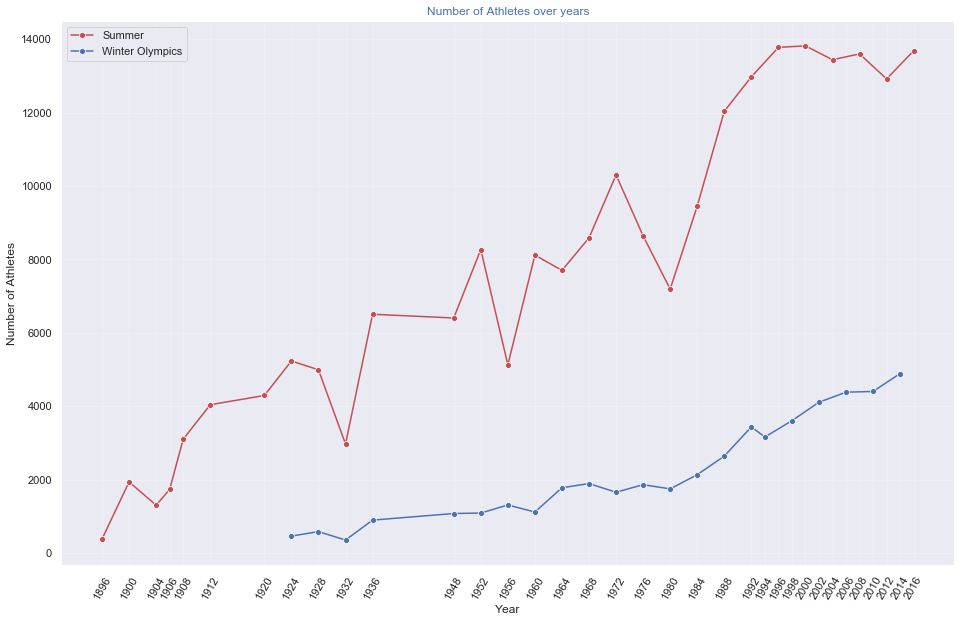

In [13]:
fig = plt.figure(figsize = (16, 10))

sns.lineplot(x = 'Year' , y = 'Name' , data = tmp_summer, label = 'Summer' , color = 'r' , marker = 'o')
sns.lineplot(x = 'Year', y = 'Name', data = tmp_winter, label = 'Winter Olympics', color = 'b', marker = 'o')
plt.xlabel('Year')
plt.xticks(athlete_events['Year'].unique(), rotation = 60)

plt.ylabel('Number of Athletes')
plt.title("Number of Athletes over years",color="b")
plt.grid(True,alpha=.2)



plt.show()




In [14]:
# remove chart junk
#plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['top'].set_visible(False)
#plt.gca().legend()
#plt.gca().grid(False)

From the above plot, we can draw several interesting points:

Starting from 1924, the Winter Olympics is organized. At the beginning (1924-1992), the two Olympics were taken place in the same year. It was changed in 1994.

During the analyzed period, there were two times when no Olympics were organized. In both cases, the reason was the war (for 1916, World War I and for 1940 and 1944, World War II)

1906 was an exception to the “every 4 years” rule as it was an experiment to hold the intercalculated games in Greece all the time and move the Olympics around. However, Greece was not able to hold the 1910 games and the 4-year rule was standardized.

There were several years when the attendance dipped. The year and the reasons are listed below:

1932: The Olympic occured in the midst of the Great Depression and in a remote location, such that many athletes were unable to afford the trip to the Olympics.
1956: Several boycotts: Iraq, Egypt, and Lebanon did not participate due to the involvement of France and Britain in the Suez Crisis; the Netherlands, Spain, Switzerland, and Cambodia did not participate due to the Soviet Union’s beatdown of the Hungarian Revolution; and China did not participate in protest of the IOC’s recognition of Taiwan.
1976: 25 nations, mostly African, boycotted the Games in reponse to apartheid policies in South Africa. Attendance at the 1980 Winter Olympics in Lake Placid wasn’t affected much since African nations have a limited presence at the Winter Games.
1980: 66 nations, including the U.S., boycotted the Games in response to the Soviet invasion of Afghanistan.

# Countries participation at the Olympic Games

In [15]:
summer_data = (summer_athlete_events[['Year', 'NOC']].drop_duplicates(['Year', 'NOC']))['Year'].value_counts()
winter_data = (winter_athlete_events[['Year', 'NOC']].drop_duplicates(['Year', 'NOC']))['Year'].value_counts()

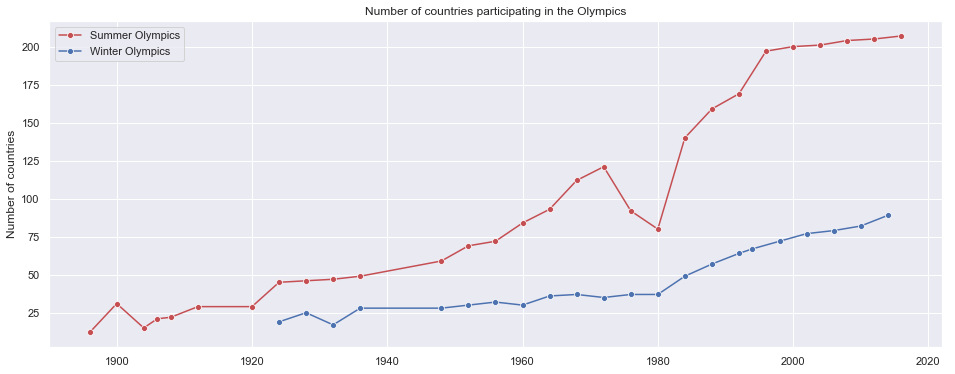

In [16]:
plt.figure(figsize = (16, 6))
sns.lineplot(x = summer_data.index.values, y = summer_data.values, color = 'r', label = 'Summer Olympics', marker = 'o')
sns.lineplot(x = winter_data.index.values, y = winter_data.values, color = 'b', label = 'Winter Olympics', marker = 'o')
plt.ylabel('Number of countries')
plt.title('Number of countries participating in the Olympics')

plt.show()

In general, the number of countries participating in the Olympics has increased over time. The number went down significantly at 1980. 

# Age analysis

 Average age by Year

In [17]:
summer_mean_age = summer_athlete_events[pd.notnull(summer_athlete_events['Age'])]
winter_mean_age = winter_athlete_events[pd.notnull(winter_athlete_events['Age'])]

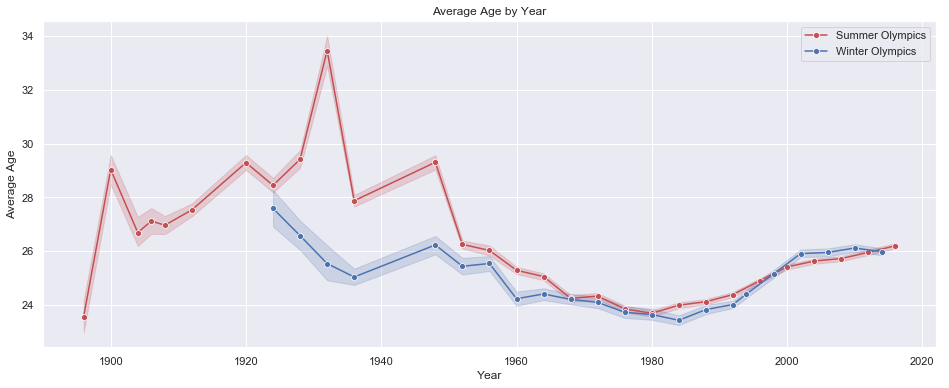

In [18]:
fig = plt.figure(figsize = (16, 6))
sns.lineplot(x = 'Year', y = 'Age', data = summer_mean_age, label = 'Summer Olympics', color = 'r', marker = 'o')
sns.lineplot(x = 'Year', y = 'Age', data = winter_mean_age, label = 'Winter Olympics', color = 'b', marker = 'o')

plt.title('Average Age by Year')
plt.ylabel('Average Age')
plt.show()

As seen, the average age of atheletes were much heigher in the period of 1896 - 1950s. In recent years, the average age seems to go up but still not as high as in the period of 1896 - 1950s.

Age distribution

Text(0.5,1,'Age distribution of Summer Olympics Atheletes')

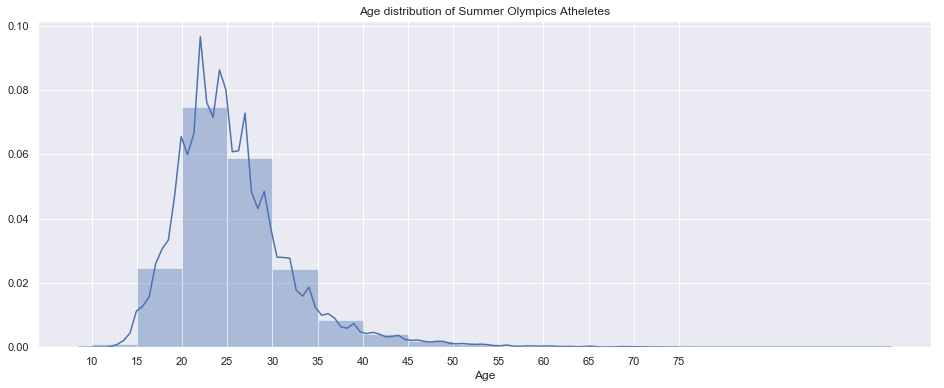

In [19]:
bins_list = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]

plt.figure(figsize = (16, 6))

# Summer Olympics
plt.subplot()
sns.distplot(summer_athlete_events['Age'].dropna(), bins = bins_list)
plt.xticks(bins_list)
plt.xlabel("Age")
plt.title("Age distribution of Summer Olympics Atheletes")



Text(0.5,1,'Age distribution of Winter Olympics Atheletes')

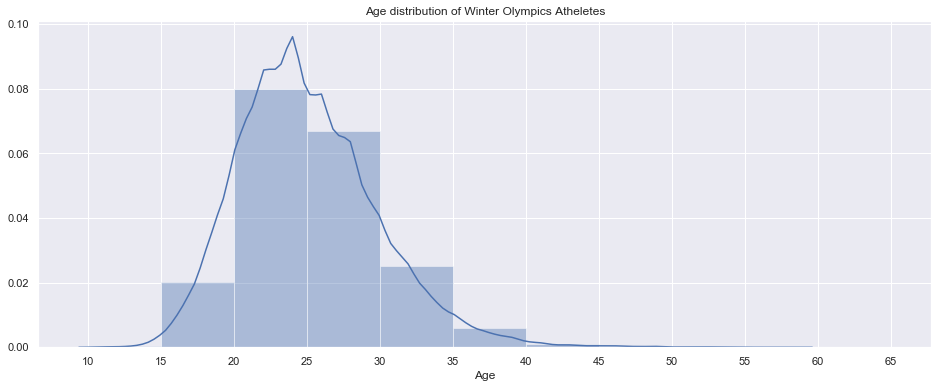

In [20]:
bins_list = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]

plt.figure(figsize = (16, 6))


# Winter Olympics

plt.subplot()
sns.distplot(winter_athlete_events['Age'].dropna(), bins = bins_list)
plt.xticks(bins_list)
plt.xlabel("Age")
plt.title("Age distribution of Winter Olympics Atheletes")



The two Olympics share the same age buckets with most athletes in the 20-30 range.

# 6. Gender distribution

In [21]:
summer_gender = summer_athlete_events.groupby('Sex')
winter_gender = winter_athlete_events.groupby('Sex')

Text(0.5,1,'Gender count -Summer')

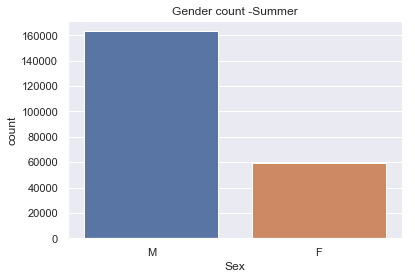

In [22]:
summer_athlete_events.Sex.unique()
summer_athlete_events.Sex.value_counts()
sns.countplot(summer_athlete_events.Sex)
plt.title('Gender count -Summer')


Text(0.5,1,'Gender count -Winter')

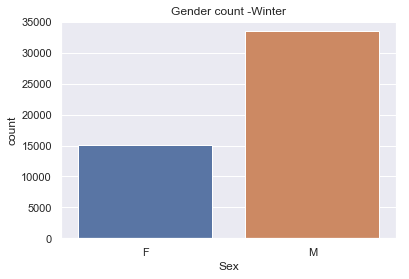

In [23]:
winter_athlete_events.Sex.unique()
winter_athlete_events.Sex.value_counts()

sns.countplot(winter_athlete_events.Sex)

plt.title('Gender count -Winter')

# Physical characteristics

Height Distribution

In [24]:
summer_athlete_height = summer_athlete_events[pd.notnull(summer_athlete_events['Height'])]
summer_athlete_height.drop_duplicates(subset=['Name', 'NOC', 'Year'], keep='first', inplace=True)

winter_athlete_height = winter_athlete_events[pd.notnull(winter_athlete_events['Height'])]
winter_athlete_height.drop_duplicates(subset=['Name', 'NOC', 'Year'], keep='first', inplace=True)

C:\Users\richa.sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\richa.sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0.5,0,'cm')

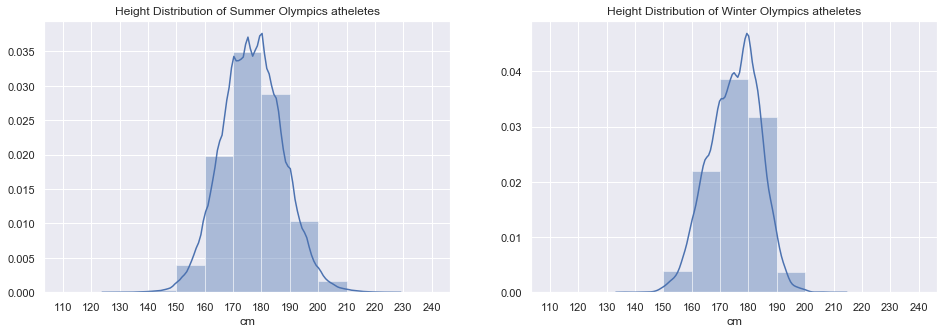

In [25]:
plt.figure(figsize = (16, 5))
bins_list = [110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240]

plt.subplot(121)
plt.xticks(bins_list)
sns.distplot(summer_athlete_height['Height'], bins = bins_list)
plt.title('Height Distribution of Summer Olympics atheletes')
plt.xlabel('cm')


plt.subplot(122)
plt.xticks(bins_list)
sns.distplot(winter_athlete_height['Height'], bins = bins_list)
plt.title('Height Distribution of Winter Olympics atheletes')
plt.xlabel('cm')


Weight distribution

In [26]:
summer_athlete_weight = summer_athlete_events[pd.notnull(summer_athlete_events['Weight'])]
summer_athlete_weight.drop_duplicates(subset=['Name', 'NOC', 'Year'], keep='first', inplace=True)

winter_athlete_weight = winter_athlete_events[pd.notnull(winter_athlete_events['Weight'])]
winter_athlete_weight.drop_duplicates(subset=['Name', 'NOC', 'Year'], keep='first', inplace=True)

C:\Users\richa.sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\richa.sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0.5,0,'kg')

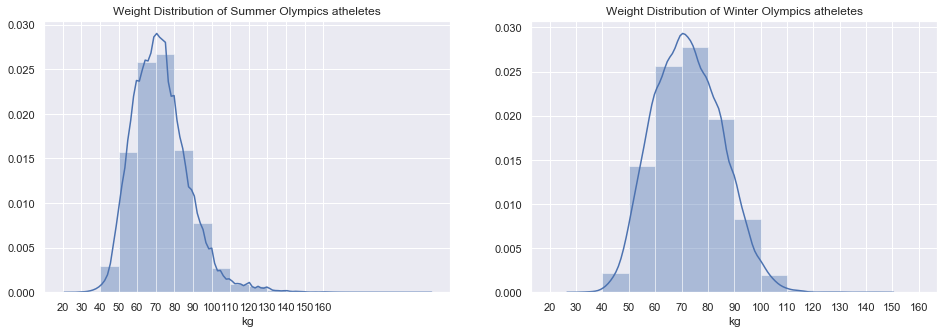

In [27]:
plt.figure(figsize = (16, 5))
bins_list = [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]

plt.subplot(121)
plt.xticks(bins_list)
sns.distplot(summer_athlete_weight['Weight'], bins = bins_list)
plt.title('Weight Distribution of Summer Olympics atheletes')
plt.xlabel('kg')


plt.subplot(122)
plt.xticks(bins_list)
sns.distplot(winter_athlete_weight['Weight'], bins = bins_list)
plt.title('Weight Distribution of Winter Olympics atheletes')
plt.xlabel('kg')


# Medal distribution by country

In [28]:
summer_medals = summer_athlete_events[pd.notnull(summer_athlete_events['Medal'])]
winter_medals = winter_athlete_events[pd.notnull(winter_athlete_events['Medal'])]

Text(0.5,1,'Medal distribution by country in the Summer Olympics')

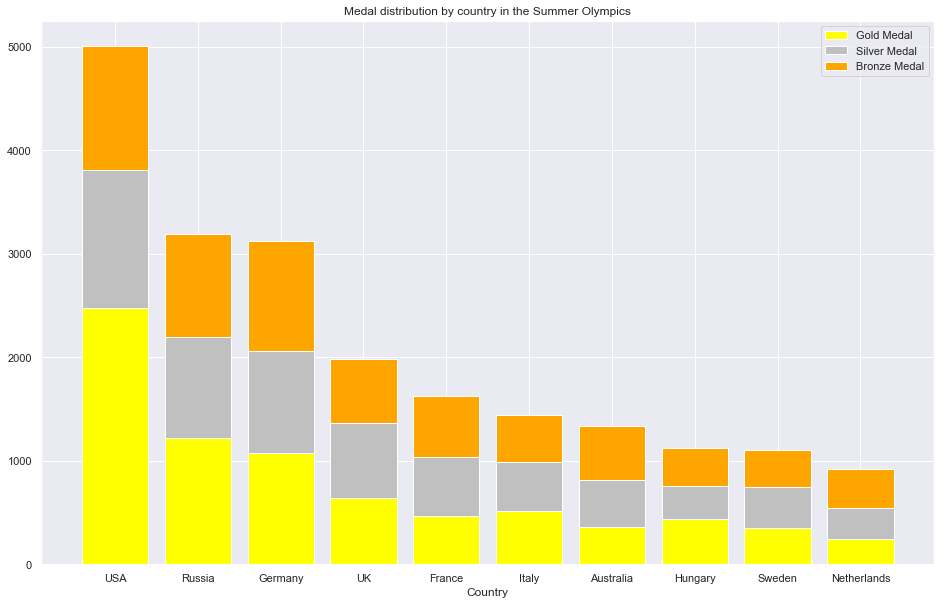

In [29]:
top_n_countries = pd.value_counts(summer_medals['region']).iloc[:10].index
tmp_country_medals = summer_medals[summer_medals['region'].isin(top_n_countries)]
tmp_country_medals
country_medals = pd.DataFrame(columns = ['region', 'Gold', 'Silver', 'Bronze', 'Total'])
for i in top_n_countries:
    tmp = summer_medals[summer_medals['region'] == i]
    medals = pd.value_counts(tmp['Medal'])
    country_medals = country_medals.append({'region': i, 'Gold': medals['Gold'], 'Silver': medals['Silver'], 
                                            'Bronze': medals['Bronze'], 'Total': medals['Gold'] + medals['Silver'] + medals['Bronze']
                                           },ignore_index=True)
    country_medals.sort_values('Total', ascending = False, inplace = True)

x = country_medals['region']    
    
plt.figure(figsize = (16, 10))

gold = plt.bar(x, country_medals['Gold'], color = 'yellow', label = 'Gold Medal')
silver = plt.bar(x, country_medals['Silver'], bottom = country_medals['Gold'], color = 'silver', label = 'Silver Medal')
bronze = plt.bar(x, country_medals['Bronze'], bottom = country_medals['Gold'] + country_medals['Silver'], color = 'orange', label = 'Bronze Medal')
#plt.xticks(rotation = 60)
plt.legend()
plt.xlabel('Country')
plt.title('Medal distribution by country in the Summer Olympics')

So far, in the Summer Olympic, the USA has won the most medals (both in total and gold) followed by Russia and the UK.

Text(0.5,1,'Medal distribution by country in the Winter Olympics')

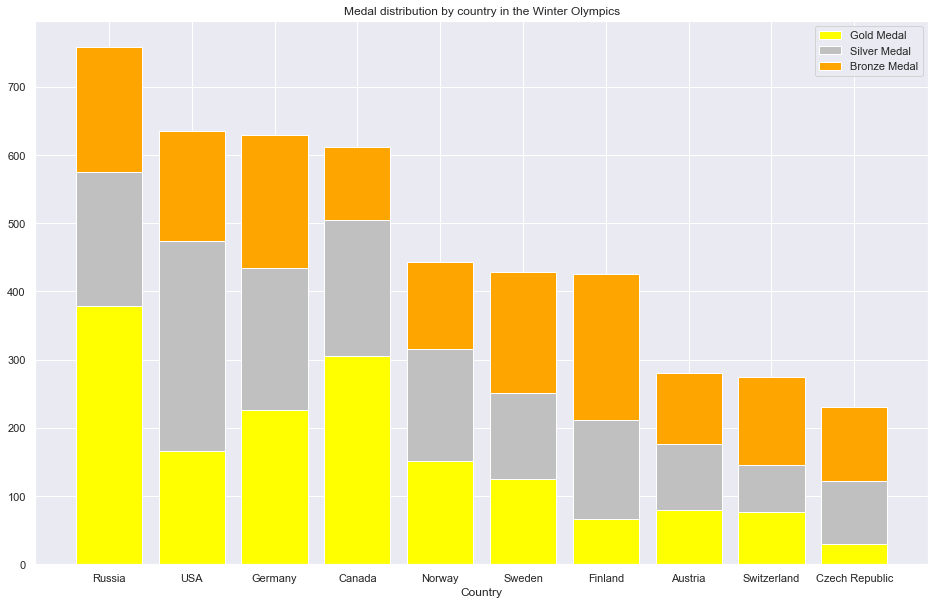

In [30]:
top_n_countries = pd.value_counts(winter_medals['region']).iloc[:10].index
tmp_country_medals = winter_medals[winter_medals['region'].isin(top_n_countries)]
tmp_country_medals
country_medals = pd.DataFrame(columns = ['region', 'Gold', 'Silver', 'Bronze', 'Total'])
for i in top_n_countries:
    tmp = winter_medals[winter_medals['region'] == i]
    medals = pd.value_counts(tmp['Medal'])
    country_medals = country_medals.append({'region': i, 'Gold': medals['Gold'], 'Silver': medals['Silver'], 
                                            'Bronze': medals['Bronze'], 'Total': medals['Gold'] + medals['Silver'] + medals['Bronze']
                                           },ignore_index=True)
    country_medals.sort_values('Total', ascending = False, inplace = True)

x = country_medals['region']    
    
plt.figure(figsize = (16, 10))

gold = plt.bar(x, country_medals['Gold'], color = 'yellow', label = 'Gold Medal')
silver = plt.bar(x, country_medals['Silver'], bottom = country_medals['Gold'], color = 'silver', label = 'Silver Medal')
bronze = plt.bar(x, country_medals['Bronze'], bottom = country_medals['Gold'] + country_medals['Silver'], color = 'orange', label = 'Bronze Medal')

#plt.xticks(rotation = 60)

plt.legend()
plt.xlabel('Country')
plt.title('Medal distribution by country in the Winter Olympics')

In the Winter Olympics, however, the USA does not dominate but Russia. Germany and Canada also hold a high position as of the USA

# Observations for Canada

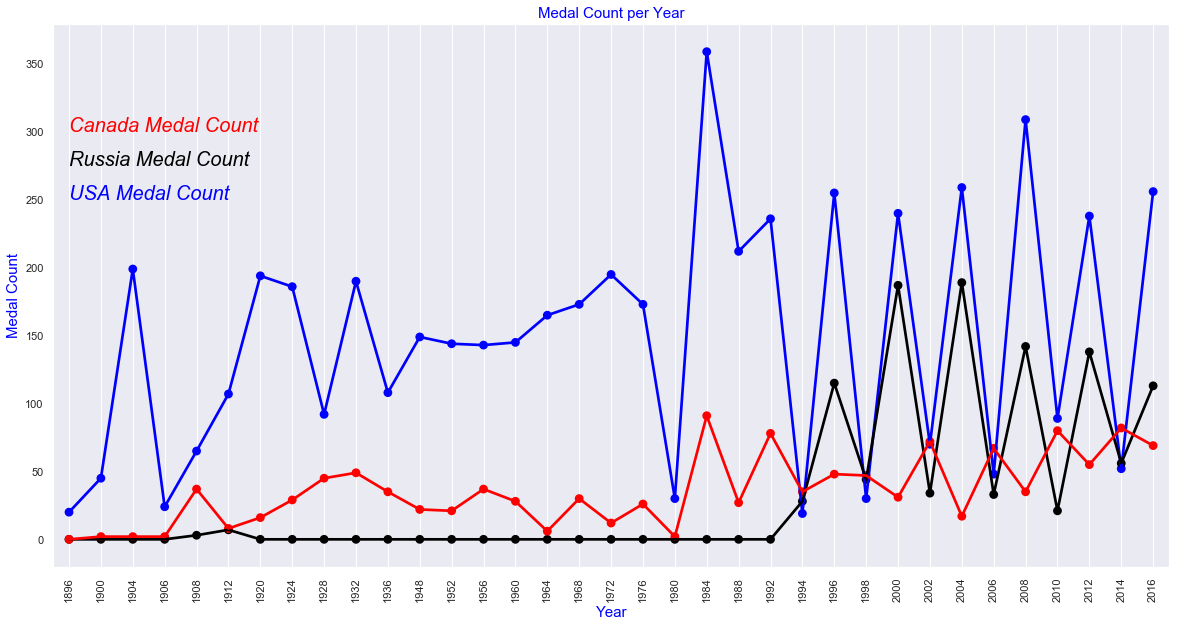

In [31]:
#This section shows the medals that the Canadian team has won from the very beginning to this time.
sum_of_medal_just_canada=[]
sum_of_medal_just_usa=[]
sum_of_medal_just_russia=[]

for year in athlete_events.Year.unique():
    sum_of_medal_just_canada.append(athlete_events[(athlete_events['Year']==year)&(athlete_events['Team']=='Canada')].Medal.count())
    sum_of_medal_just_usa.append(athlete_events[(athlete_events['Year']==year)&(athlete_events['Team']=='United States')].Medal.count())
    sum_of_medal_just_russia.append(athlete_events[(athlete_events['Year']==year)&(athlete_events['Team']=='Russia')].Medal.count())
    
sum_of_medal_just_canada=pd.DataFrame(sum_of_medal_just_canada,columns=['Canada_Medal_Count'])
sum_of_medal_just_usa=pd.DataFrame(sum_of_medal_just_usa,columns=['USA_Medal_Count'])
sum_of_medal_just_russia=pd.DataFrame(sum_of_medal_just_russia,columns=['Russia_Medal_Count'])

year_unique=pd.DataFrame(athlete_events.Year.unique(),columns=['Year'])

all_data_medal_canada=pd.concat([year_unique,sum_of_medal_just_canada],axis=1)
sum_of_medal_just_usa=pd.concat([year_unique,sum_of_medal_just_usa],axis=1)
sum_of_medal_just_russia=pd.concat([year_unique,sum_of_medal_just_russia],axis=1)

all_data_medal_usa=sum_of_medal_just_usa.sort_values(by='USA_Medal_Count',ascending='True')
all_data_medal_russia=sum_of_medal_just_russia.sort_values(by='Russia_Medal_Count',ascending='True')
all_data_medal_canada=all_data_medal_canada.sort_values(by='Canada_Medal_Count',ascending='True')
all_data_medal_canada

#Drawings will be made in this section. Also they show the medals they won every year.
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x=all_data_medal_usa.Year,y=all_data_medal_usa.USA_Medal_Count,color='blue',alpha=0.8)
sns.pointplot(x=all_data_medal_russia.Year,y=all_data_medal_russia.Russia_Medal_Count,color='black',alpha=0.8)
sns.pointplot(x=all_data_medal_canada.Year,y=all_data_medal_canada.Canada_Medal_Count,color='red',alpha=0.8)
plt.text(0,300,'Canada Medal Count',color='red',fontsize = 20,style = 'italic')
plt.text(0,275,'Russia Medal Count',color='black',fontsize = 20,style = 'italic')
plt.text(0,250,'USA Medal Count',color='blue',fontsize = 20,style = 'italic')

plt.xlabel('Year',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.ylabel('Medal Count',fontsize = 15,color='blue')
plt.title('Medal Count per Year',fontsize = 15,color='blue')
plt.grid()

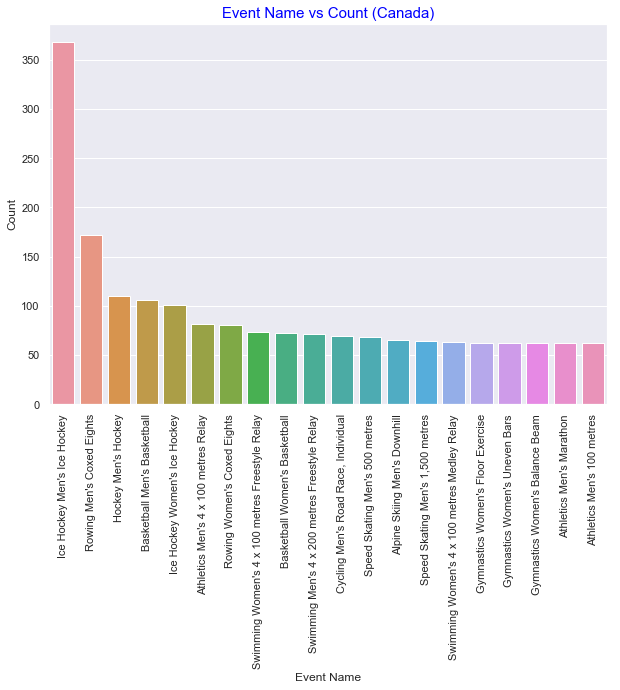

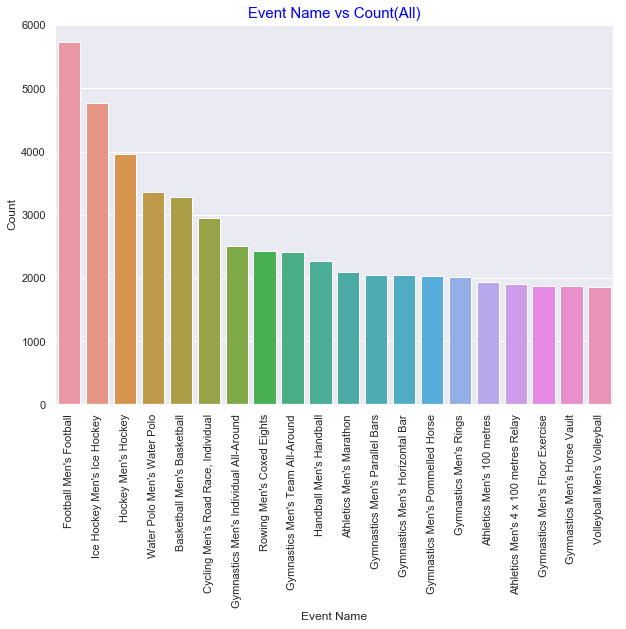

In [62]:
#In this section, necessary actions are taken for event processing. 
#In addition, all documents are scanned.

event_data = athlete_events[(athlete_events['Team']=='Canada')].Event.value_counts()

plt.figure(figsize=(10,7))
sns.barplot(x=event_data.index[:20],y=event_data.values[:20])
plt.xlabel('Event Name')
plt.ylabel('Count')
plt.title('Event Name vs Count (Canada)',fontsize=15,color='blue')
plt.xticks(rotation=90)
plt.show()

event_data=athlete_events.Event.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=event_data.index[:20],y=event_data.values[:20])
plt.xlabel('Event Name')
plt.ylabel('Count')
plt.title('Event Name vs Count(All)',fontsize=15,color='blue')
plt.xticks(rotation=90)
plt.show()

In [33]:

summer_olympic=athlete_events[athlete_events['Season']=='Summer']
sport_count_summer =summer_olympic.groupby('Sport').apply(lambda x:x['Year'].unique()).to_frame().reset_index()
sport_count_summer.columns=['Sport','Years']
sport_count_summer['Count']=[len(c) for c in sport_count_summer['Years']]

sport_count_summer['Years']=pd.Series(sport_count_summer['Years'])
sport_count_summer['Years']=sport_count_summer['Years'].apply(lambda x:sorted(x))  ### Sort Year in ascending order inside the Year column.

sport_count_summer.sort_values('Count',ascending=False,inplace=True)
#sport_count_summer


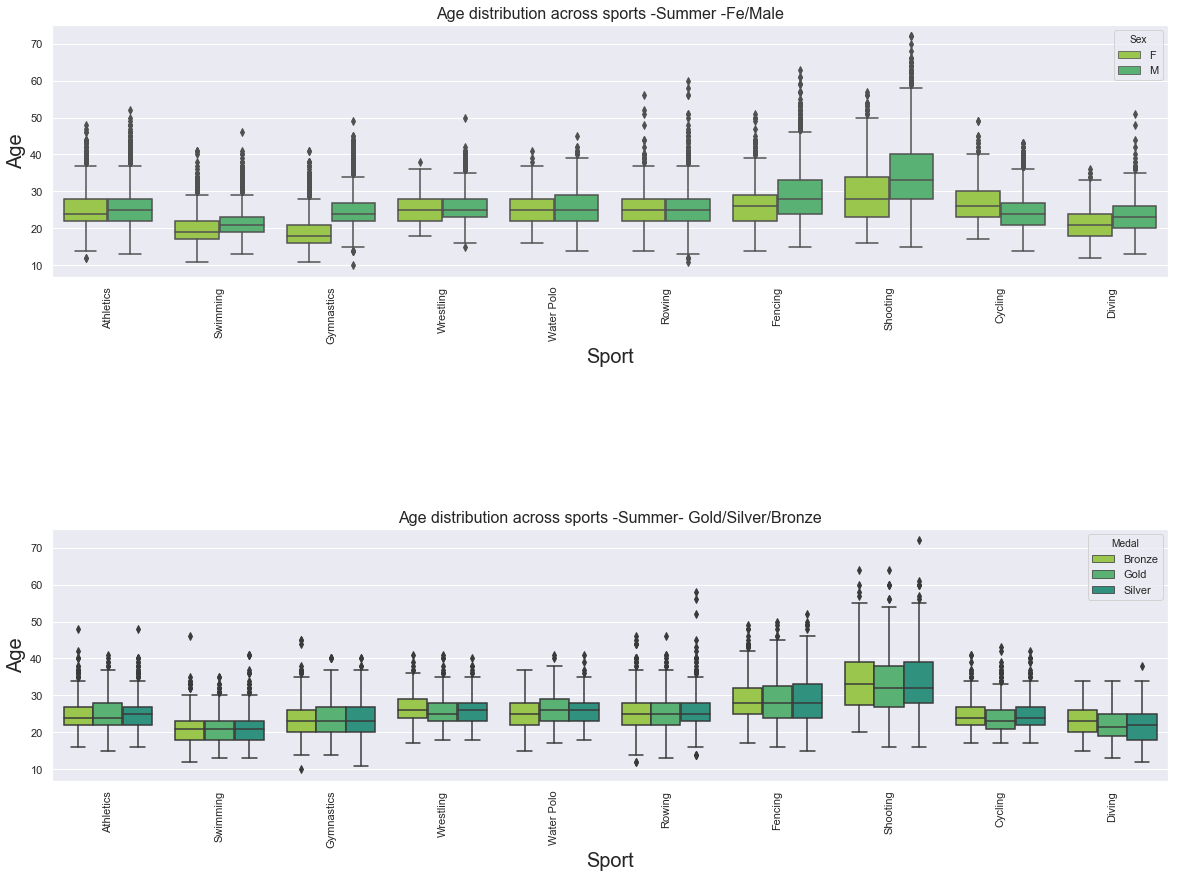

In [49]:

athlete_events_regions =pd.merge(athlete_events, regions,how='left',on='NOC')
athlete_events_regions.drop_duplicates(inplace=True,keep=False)

sport_box=athlete_events_regions[athlete_events_regions['Sport'].isin(sport_count_summer.Sport[:10])]


plt.figure(figsize=(20,20))
plt.subplot(311)
ax=sns.boxplot(x='Sport',y='Age',hue = 'Sex' ,data=sport_box,palette=sns.color_palette(palette='viridis_r'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Sport',fontsize=20)
ax.set_ylabel('Age',fontsize=20)
ax.set_title('Age distribution across sports -Summer -Fe/Male',fontsize=16)

plt.subplot(312)
ax=sns.boxplot(x='Sport',y='Age',hue = 'Medal',data=sport_box,palette=sns.color_palette(palette='viridis_r'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Sport',fontsize=20)
ax.set_ylabel('Age',fontsize=20)
ax.set_title('Age distribution across sports -Summer- Gold/Silver/Bronze',fontsize=16)

plt.subplots_adjust(wspace = 1, hspace = 1,top = 1)

Winners have age between 20 - 30 years for most of the summer sports

In [35]:
summer_olympic=athlete_events[athlete_events['Season']=='Winter']
sport_count_winter =summer_olympic.groupby('Sport').apply(lambda x:x['Year'].unique()).to_frame().reset_index()
sport_count_winter.columns=['Sport','Years']
sport_count_winter['Count']=[len(c) for c in sport_count_winter['Years']]

sport_count_winter['Years']=pd.Series(sport_count_winter['Years'])
sport_count_winter['Years']=sport_count_winter['Years'].apply(lambda x:sorted(x))  ### Sort Year in ascending order inside the Year column.

sport_count_winter.sort_values('Count',ascending=False,inplace=True)
#sport_count_winter

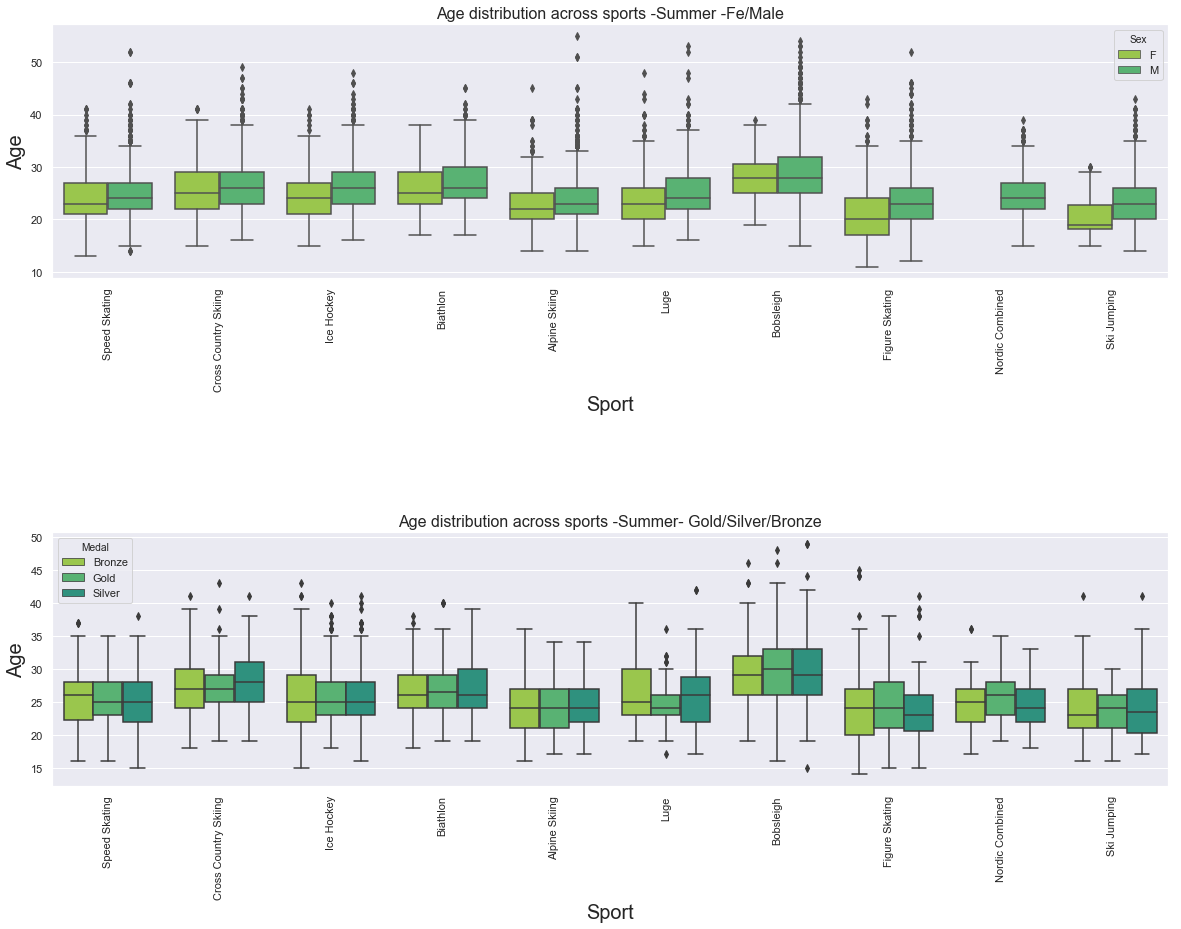

In [36]:

athlete_events_regions =pd.merge(athlete_events, regions,how='left',on='NOC')
athlete_events_regions.drop_duplicates(inplace=True,keep=False)

sport_box=athlete_events_regions[athlete_events_regions['Sport'].isin(sport_count_winter.Sport[:10])]


plt.figure(figsize=(20,15))
plt.subplot(311)
ax=sns.boxplot(x='Sport',y='Age',hue = 'Sex' ,data=sport_box,palette=sns.color_palette(palette='viridis_r'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Sport',fontsize=20)
ax.set_ylabel('Age',fontsize=20)
ax.set_title('Age distribution across sports -Summer -Fe/Male',fontsize=16)

plt.subplot(312)
ax=sns.boxplot(x='Sport',y='Age',hue = 'Medal',data=sport_box,palette=sns.color_palette(palette='viridis_r'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Sport',fontsize=20)
ax.set_ylabel('Age',fontsize=20)
ax.set_title('Age distribution across sports -Summer- Gold/Silver/Bronze',fontsize=16)



plt.subplots_adjust(wspace = 1, hspace = 1,top = 1.3)

In [37]:
winter_olympic=athlete_events[athlete_events['Season']=='Winter' ]
sport_count_winter=winter_olympic.groupby('Sport').apply(lambda x:x['Year'].unique()).to_frame().reset_index()
sport_count_winter.columns=['Sport','Years']
sport_count_winter['Count']=[len(c) for c in sport_count_winter['Years']]

sport_count_winter['Years']=pd.Series(sport_count_winter['Years'])
sport_count_winter['Years']=sport_count_winter['Years'].apply(lambda x:sorted(x))  ### Sort Year in ascending order inside the Year column.

sport_count_winter.sort_values('Count',ascending=False,inplace=True)
sport_count_winter

,Sport,Years,Count
8,Ice Hockey,"[1924, 1928, 1932, 1936, 1948, 1952, 1956, 196...",22
6,Figure Skating,"[1924, 1928, 1932, 1936, 1948, 1952, 1956, 196...",22
14,Ski Jumping,"[1924, 1928, 1932, 1936, 1948, 1952, 1956, 196...",22
11,Nordic Combined,"[1924, 1928, 1932, 1936, 1948, 1952, 1956, 196...",22
16,Speed Skating,"[1924, 1928, 1932, 1936, 1948, 1952, 1956, 196...",22
4,Cross Country Skiing,"[1924, 1928, 1932, 1936, 1948, 1952, 1956, 196...",22
3,Bobsleigh,"[1924, 1928, 1932, 1936, 1948, 1952, 1956, 196...",21
0,Alpine Skiing,"[1936, 1948, 1952, 1956, 1960, 1964, 1968, 197...",19
2,Biathlon,"[1960, 1964, 1968, 1972, 1976, 1980, 1984, 198...",15
9,Luge,"[1964, 1968, 1972, 1976, 1980, 1984, 1988, 199...",14


# Relation between Age , height , sport, winners

Athletics Age


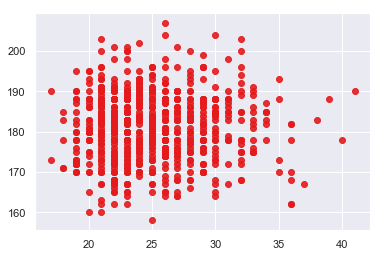

Gymnastics Age


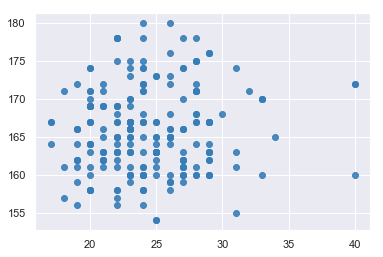

Swimming Age


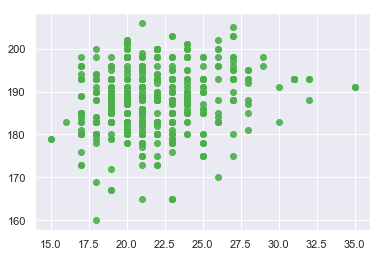

Shooting Age


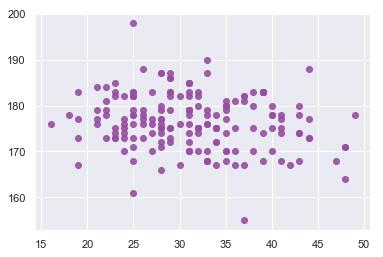

Cycling Age


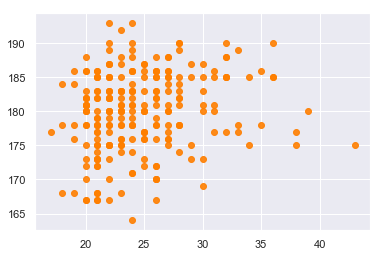

Fencing Age


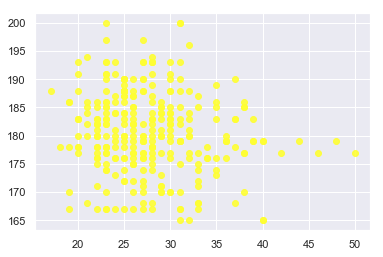

Rowing Age


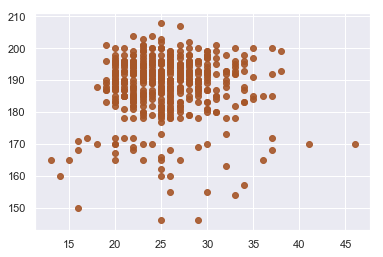

Cross Country Skiing Age
Alpine Skiing Age
Wrestling Age


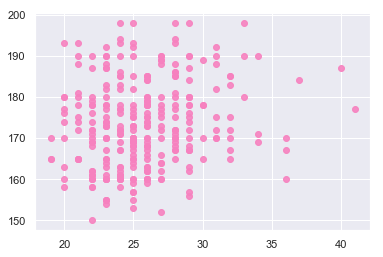

Football Age


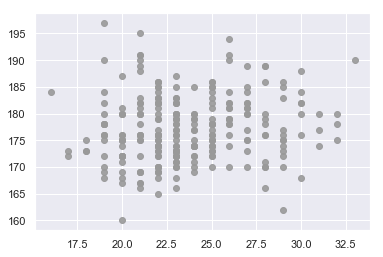

Sailing Age


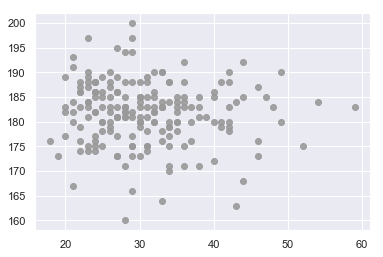

Equestrianism Age


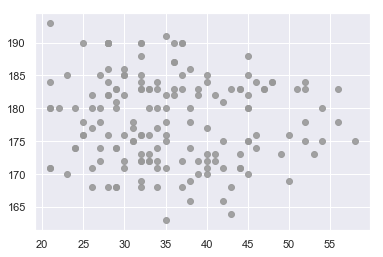

Canoeing Age


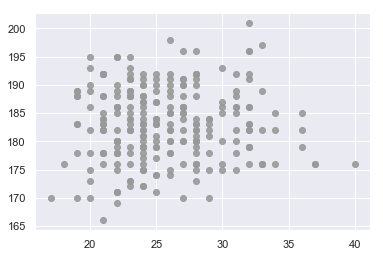

Boxing Age


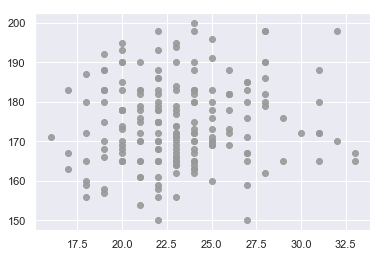

Speed Skating Age
Ice Hockey Age


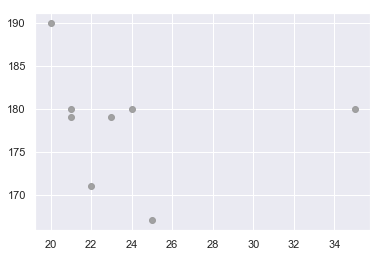

Hockey Age


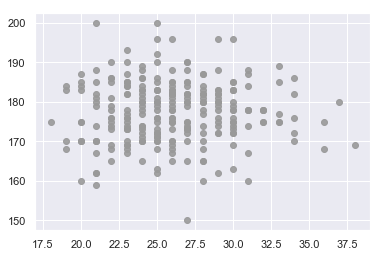

Biathlon Age
Basketball Age


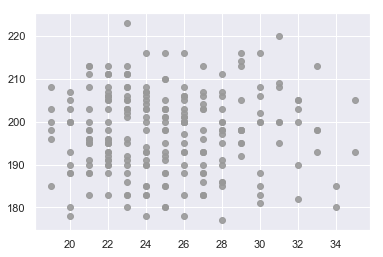

Weightlifting Age


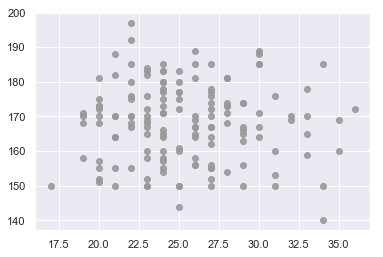

Water Polo Age


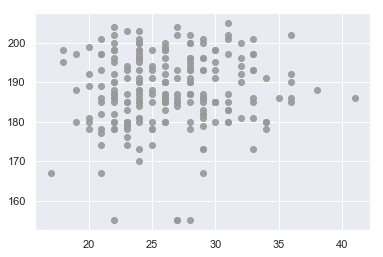

Judo Age


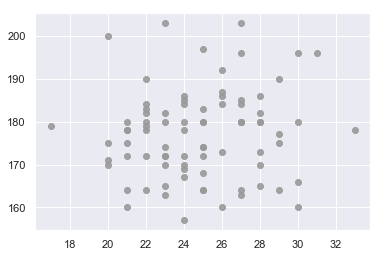

Handball Age


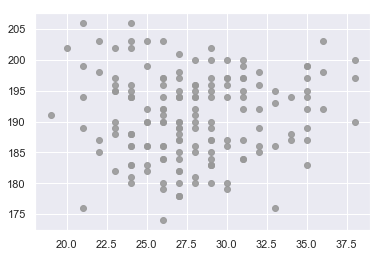

Art Competitions Age


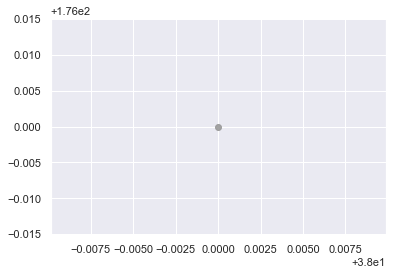

Volleyball Age


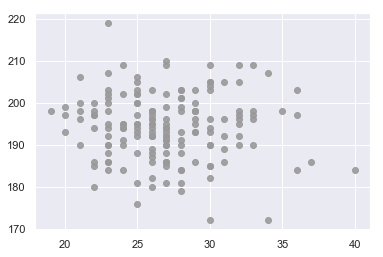

Bobsleigh Age
Tennis Age


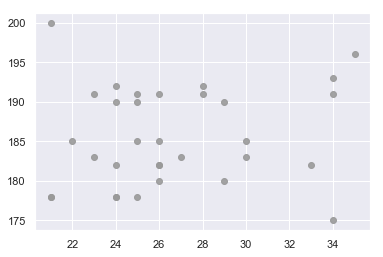

Diving Age


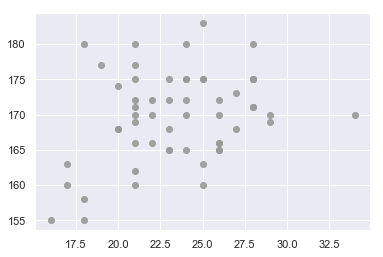

Ski Jumping Age
Archery Age


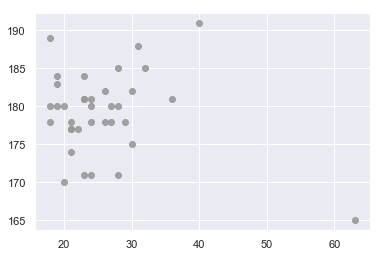

Figure Skating Age


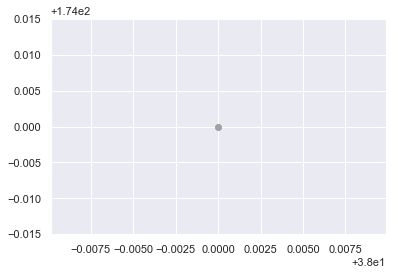

Table Tennis Age


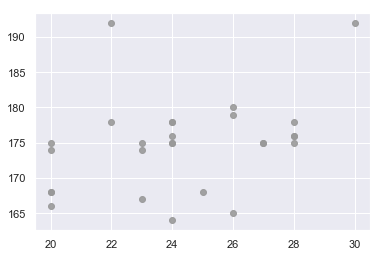

Modern Pentathlon Age


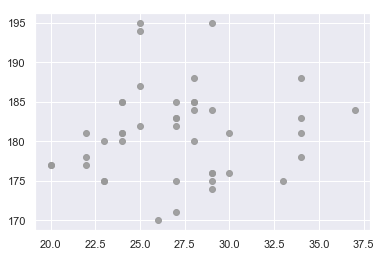

Short Track Speed Skating Age
Luge Age
Badminton Age


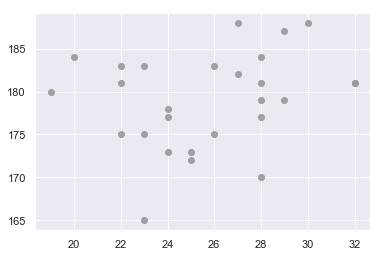

Nordic Combined Age
Freestyle Skiing Age
Snowboarding Age
Synchronized Swimming Age
Baseball Age


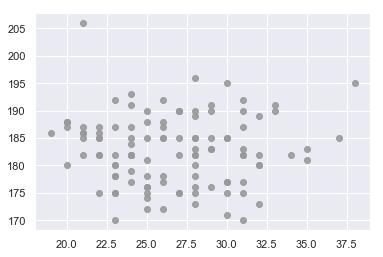

Rhythmic Gymnastics Age
Taekwondo Age


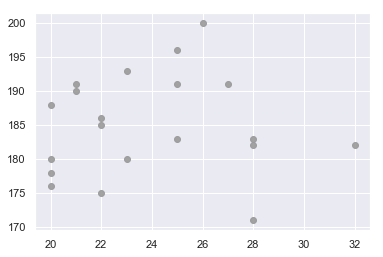

Beach Volleyball Age


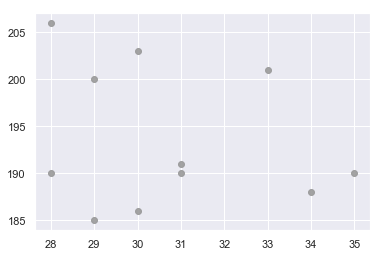

Triathlon Age


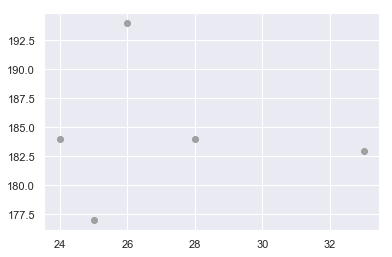

Softball Age
Curling Age
Rugby Sevens Age


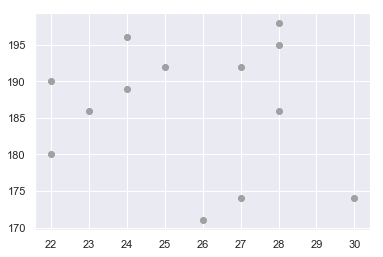

Golf Age


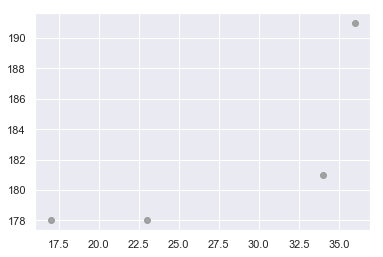

In [50]:
# Sport wise , Male , Age and height scatter plot , Summer
types_sports = athlete_events["Sport"].value_counts().index.tolist()
types_sports = types_sports[:50]
num = 0
palette = plt.get_cmap('Set1')

for type_sport in types_sports:
    print(type_sport, "Age")
    #new_df = athlete_events.loc[(athlete_events["Sport"] == type_sport) & (athlete_events["Sex"] == "M") & (athlete_events["Medal"] == "Gold")]
    new_df_gold = athlete_events.loc[(athlete_events["Sport"] == type_sport) & (athlete_events["Sex"] == "M") & (athlete_events["Medal"] == "Gold")& (athlete_events['Season'] == "Summer")]
    if new_df_gold.empty == False:
        plt.scatter(new_df_gold['Age'], new_df_gold['Height'] ,marker='o', color=palette(num), linewidth=1, alpha=0.9, label='column')
        num+=1
        plt.show()

Athletics Age


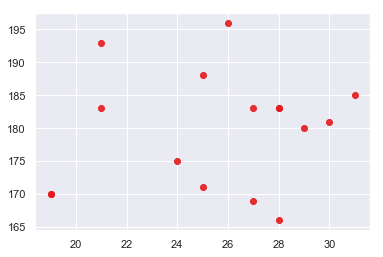

Gymnastics Age


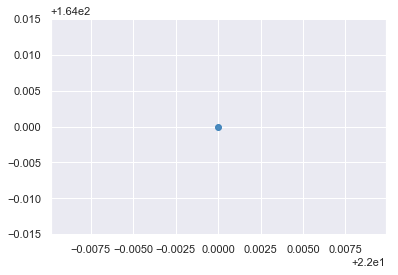

Swimming Age


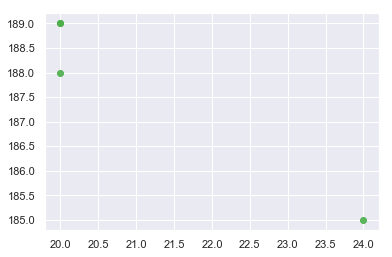

Shooting Age


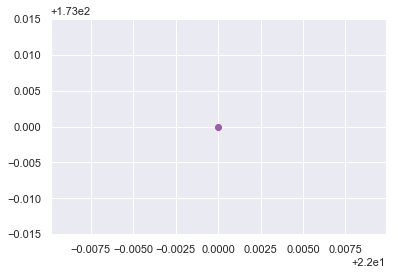

Cycling Age
Fencing Age
Rowing Age


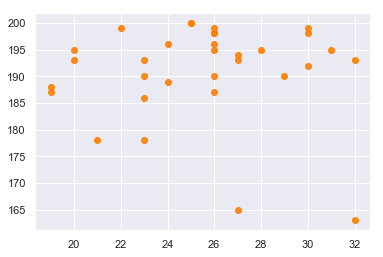

Cross Country Skiing Age
Alpine Skiing Age
Wrestling Age


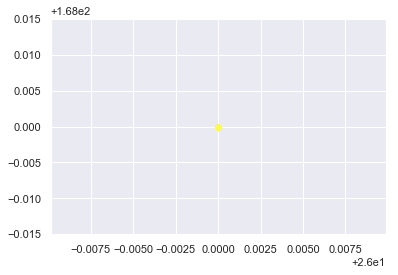

Football Age


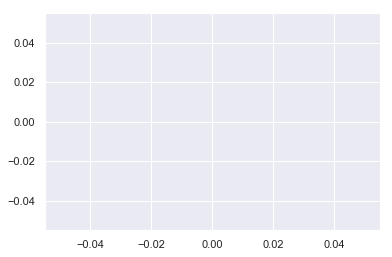

Sailing Age
Equestrianism Age


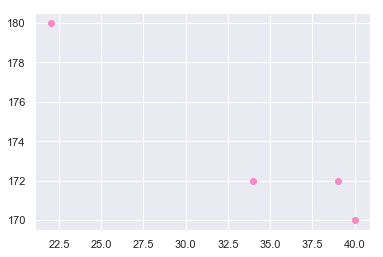

Canoeing Age


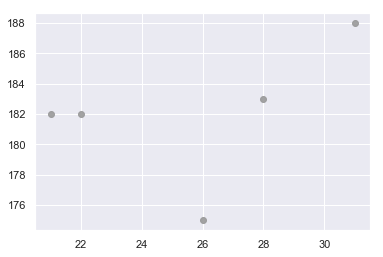

Boxing Age


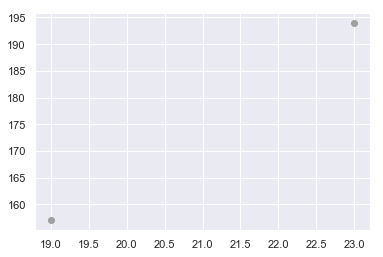

Speed Skating Age
Ice Hockey Age


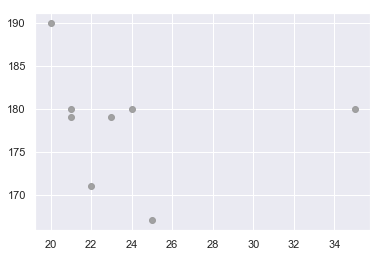

Hockey Age
Biathlon Age
Basketball Age
Weightlifting Age
Water Polo Age
Judo Age
Handball Age
Art Competitions Age
Volleyball Age
Bobsleigh Age
Tennis Age


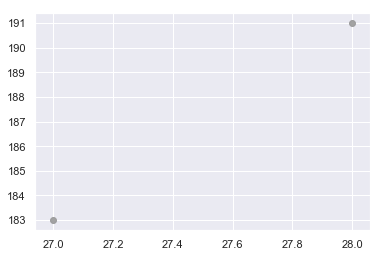

Diving Age
Ski Jumping Age
Archery Age
Figure Skating Age
Table Tennis Age
Modern Pentathlon Age
Short Track Speed Skating Age
Luge Age
Badminton Age
Nordic Combined Age
Freestyle Skiing Age
Snowboarding Age
Synchronized Swimming Age
Baseball Age
Rhythmic Gymnastics Age
Taekwondo Age
Beach Volleyball Age
Triathlon Age


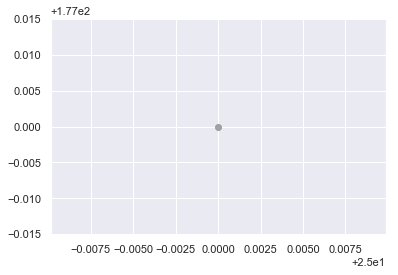

Softball Age
Curling Age
Rugby Sevens Age
Golf Age


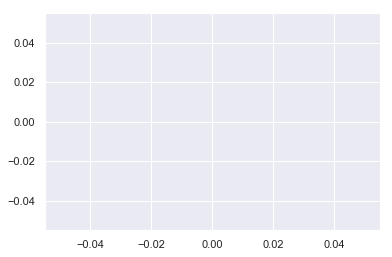

In [51]:
# Sport wise , Male , Age and height scatter plot , Summer , Canada
types_sports = athlete_events["Sport"].value_counts().index.tolist()
types_sports = types_sports[:50]
num = 0
palette = plt.get_cmap('Set1')

for type_sport in types_sports:
    print(type_sport, "Age")
    #new_df = athlete_events.loc[(athlete_events["Sport"] == type_sport) & (athlete_events["Sex"] == "M") & (athlete_events["Medal"] == "Gold")]
    new_df_gold = athlete_events.loc[(athlete_events["Sport"] == type_sport) & (athlete_events["Sex"] == "M") & (athlete_events["Medal"] == "Gold")& (athlete_events['Season'] == "Summer") & (athlete_events['NOC'] == 'CAN')]
    if new_df_gold.empty == False:
        plt.scatter(new_df_gold['Age'], new_df_gold['Height'] ,marker='o', color=palette(num),  alpha=0.9, label='column')
        num+=1
        plt.show()

Athletics Age
Gymnastics Age
Swimming Age
Shooting Age
Cycling Age
Fencing Age
Rowing Age
Cross Country Skiing Age


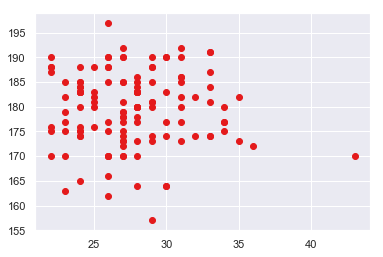

Alpine Skiing Age


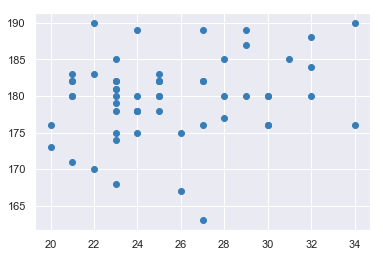

Wrestling Age
Football Age
Sailing Age
Equestrianism Age
Canoeing Age
Boxing Age
Speed Skating Age


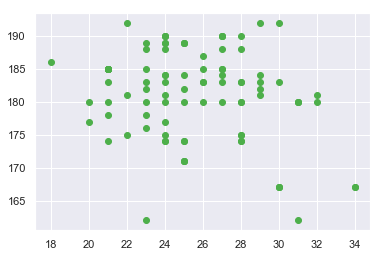

Ice Hockey Age


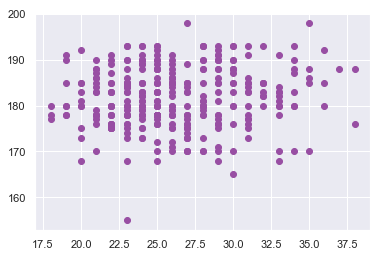

Hockey Age
Biathlon Age


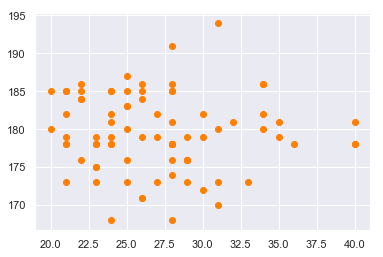

Basketball Age


In [52]:
# Sport wise , Male , Age and height scatter plot , Winter 
types_sports = athlete_events["Sport"].value_counts().index.tolist()
types_sports = types_sports[:20]
num = 0
palette = plt.get_cmap('Set1')

for type_sport in types_sports:
    print(type_sport, "Age")
    #new_df = athlete_events.loc[(athlete_events["Sport"] == type_sport) & (athlete_events["Sex"] == "M") & (athlete_events["Medal"] == "Gold")]
    new_df_gold = athlete_events.loc[(athlete_events["Sport"] == type_sport) & (athlete_events["Sex"] == "M") & (athlete_events["Medal"] == "Gold")& (athlete_events['Season'] == "Winter")]
    if new_df_gold.empty == False:
        #plt.scatter(new_df_gold['Age'], new_df_gold['Height'] ,new_df_gold['Weight'],marker='o', color=palette(num), linewidth=1, alpha=0.9, label='column')
        plt.scatter(new_df_gold['Age'], new_df_gold['Height'] ,marker='o', color=palette(num),label='column')
        num+=1
        plt.show()

Athletics Age
Gymnastics Age
Swimming Age
Shooting Age
Cycling Age
Fencing Age
Rowing Age
Cross Country Skiing Age
Alpine Skiing Age
Wrestling Age
Football Age
Sailing Age
Equestrianism Age
Canoeing Age
Boxing Age
Speed Skating Age


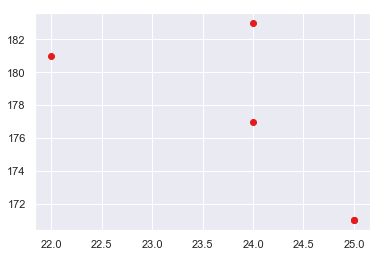

Ice Hockey Age


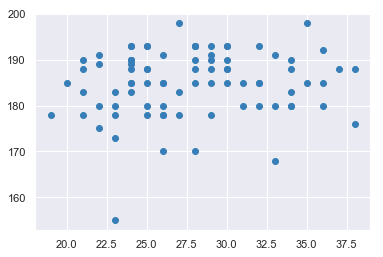

Hockey Age
Biathlon Age
Basketball Age


In [53]:
# Sport wise , Male , Age and height scatter plot , Winter , Canada
types_sports = athlete_events["Sport"].value_counts().index.tolist()
types_sports = types_sports[:20]
num = 0
palette = plt.get_cmap('Set1')

for type_sport in types_sports:
    print(type_sport, "Age")
    #new_df = athlete_events.loc[(athlete_events["Sport"] == type_sport) & (athlete_events["Sex"] == "M") & (athlete_events["Medal"] == "Gold")]
    new_df_gold = athlete_events.loc[(athlete_events["Sport"] == type_sport) & (athlete_events["Sex"] == "M") & (athlete_events["Medal"] == "Gold")& (athlete_events['Season'] == "Winter")& (athlete_events['NOC'] == "CAN")]
    if new_df_gold.empty == False:
        #plt.scatter(new_df_gold['Age'], new_df_gold['Height'] ,new_df_gold['Weight'],marker='o', color=palette(num), linewidth=1, alpha=0.9, label='column')
        plt.scatter(new_df_gold['Age'], new_df_gold['Height'] ,marker='o', color=palette(num),label='column')
        num+=1
        plt.show()

Athletics Age


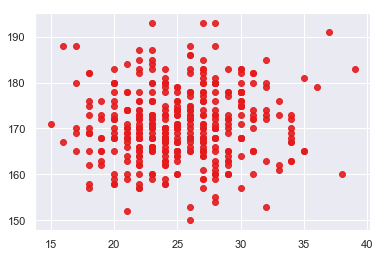

Gymnastics Age


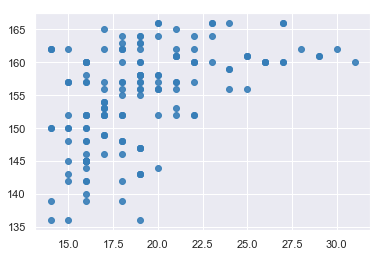

Swimming Age


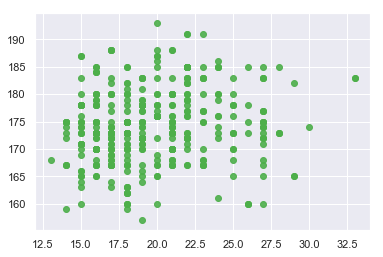

Shooting Age


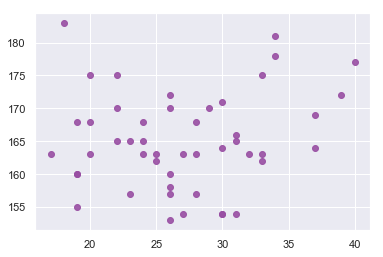

Cycling Age


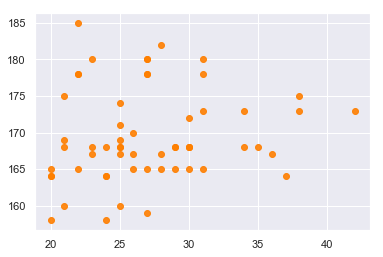

Fencing Age


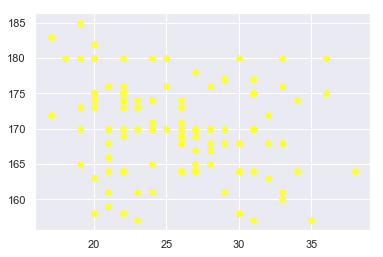

Rowing Age


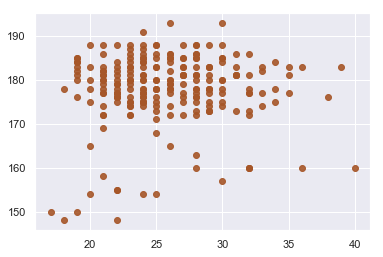

Cross Country Skiing Age
Alpine Skiing Age
Wrestling Age


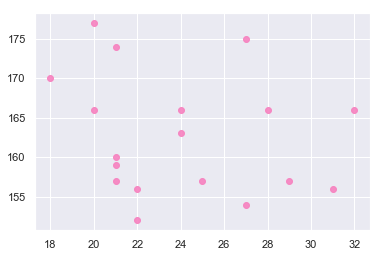

Football Age


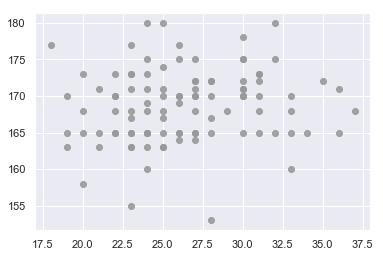

Sailing Age


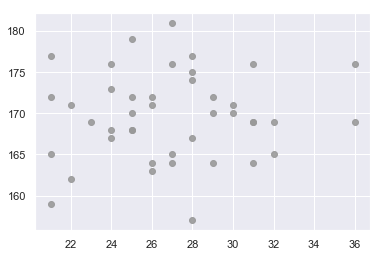

Equestrianism Age


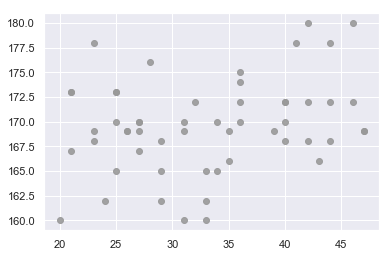

Canoeing Age


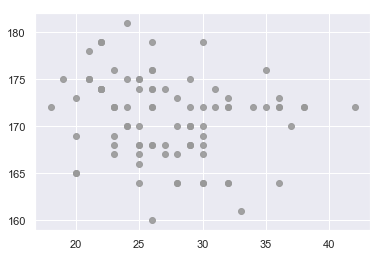

Boxing Age


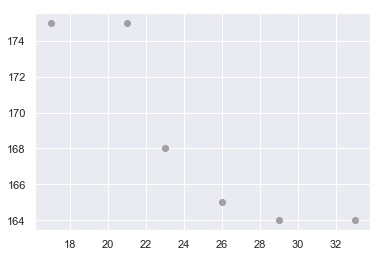

Speed Skating Age
Ice Hockey Age
Hockey Age


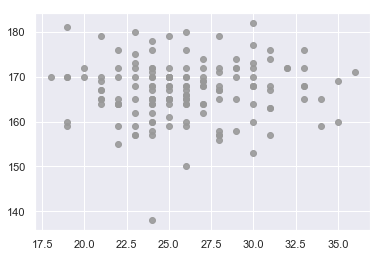

Biathlon Age
Basketball Age


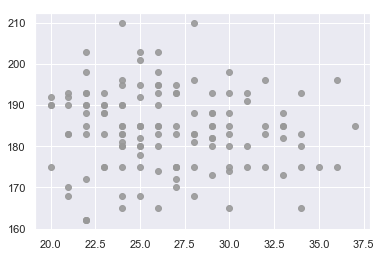

Weightlifting Age


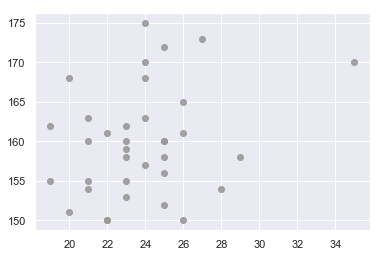

Water Polo Age


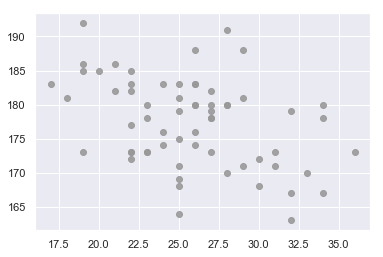

Judo Age


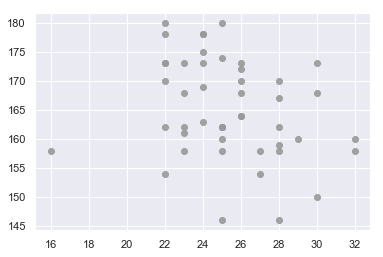

Handball Age


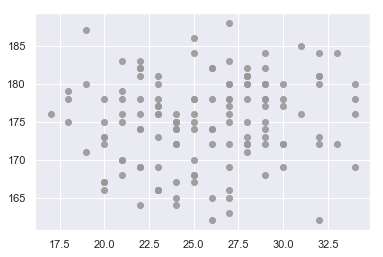

Art Competitions Age


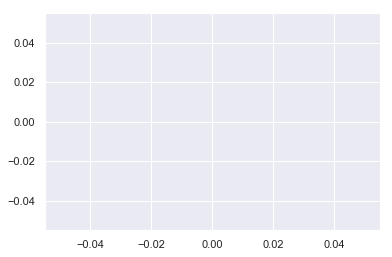

Volleyball Age


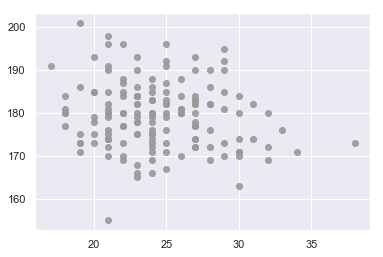

Bobsleigh Age
Tennis Age


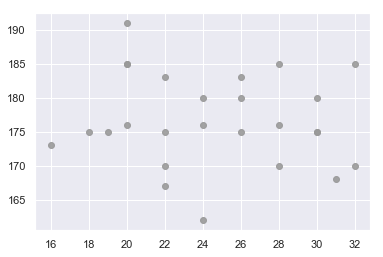

Diving Age


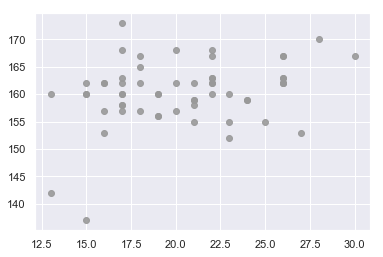

Ski Jumping Age
Archery Age


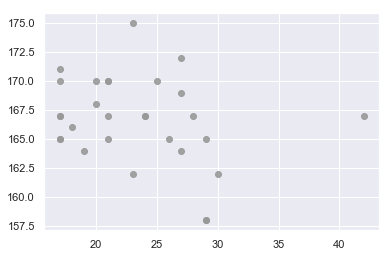

Figure Skating Age


ValueError: Invalid RGBA argument: 0.6

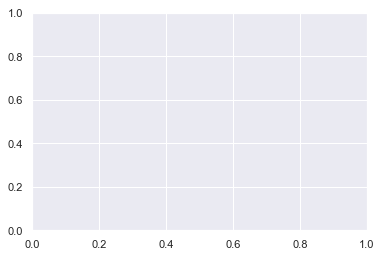

In [54]:
# Sport wise ,Female , Age and height scatter plot , Summer
types_sports = athlete_events["Sport"].value_counts().index.tolist()
types_sports = types_sports[:50]
num = 0
palette = plt.get_cmap('Set1')

for type_sport in types_sports:
    print(type_sport, "Age")
    new_df_gold = athlete_events.loc[(athlete_events["Sport"] == type_sport) & (athlete_events["Sex"] == "F") & (athlete_events["Medal"] == "Gold")& (athlete_events['Season'] == "Summer")]
    if new_df_gold.empty == False:
        plt.scatter(new_df_gold['Age'], new_df_gold['Height'] ,marker='o', color=palette(num), linewidth=1, alpha=0.9, label='column')
        num+=1
        plt.show()

Athletics Age
Gymnastics Age
Swimming Age
Shooting Age
Cycling Age
Fencing Age
Rowing Age
Cross Country Skiing Age


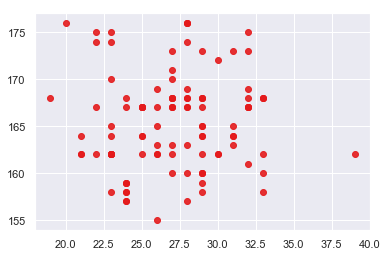

Alpine Skiing Age


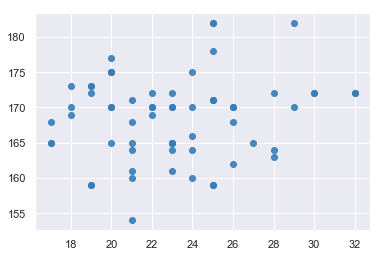

Wrestling Age
Football Age
Sailing Age
Equestrianism Age
Canoeing Age
Boxing Age
Speed Skating Age


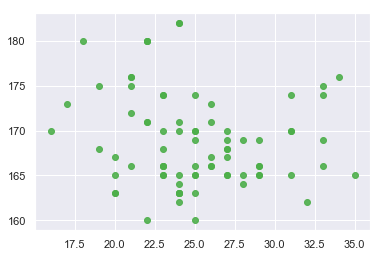

Ice Hockey Age


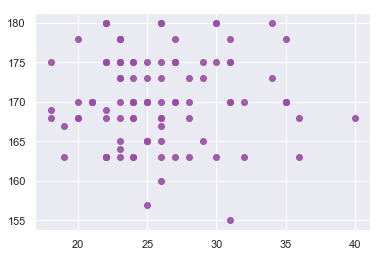

Hockey Age
Biathlon Age


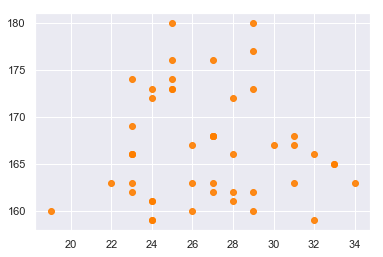

Basketball Age
Weightlifting Age
Water Polo Age
Judo Age
Handball Age
Art Competitions Age
Volleyball Age
Bobsleigh Age


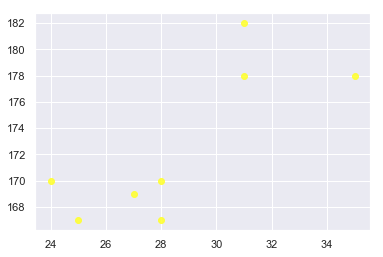

Tennis Age
Diving Age
Ski Jumping Age


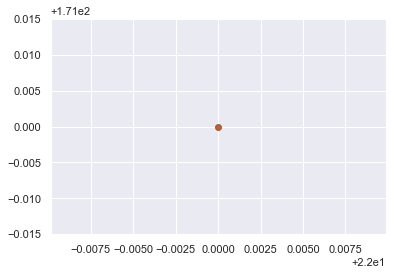

Archery Age
Figure Skating Age


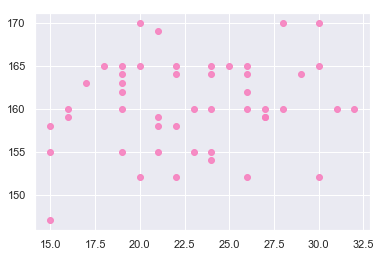

Table Tennis Age
Modern Pentathlon Age
Short Track Speed Skating Age


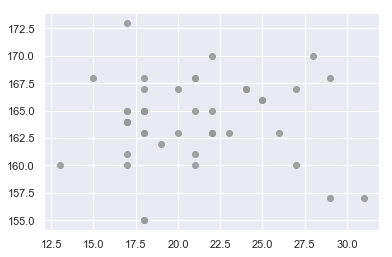

Luge Age


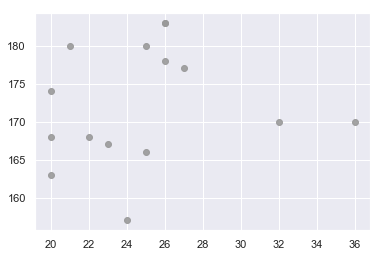

Badminton Age
Nordic Combined Age
Freestyle Skiing Age


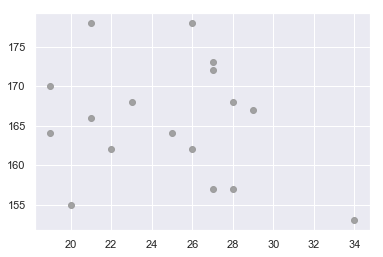

Snowboarding Age


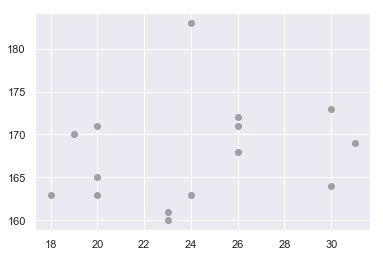

Synchronized Swimming Age
Baseball Age
Rhythmic Gymnastics Age
Taekwondo Age
Beach Volleyball Age
Triathlon Age
Softball Age
Curling Age


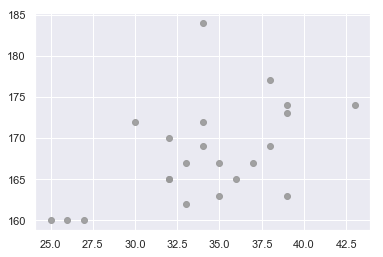

Rugby Sevens Age
Golf Age


In [55]:
# Sport wise ,Female , Age and height scatter plot , Winter
types_sports = athlete_events["Sport"].value_counts().index.tolist()
types_sports = types_sports[:50]
num = 0
palette = plt.get_cmap('Set1')

for type_sport in types_sports:
    print(type_sport, "Age")
    #new_df = athlete_events.loc[(athlete_events["Sport"] == type_sport) & (athlete_events["Sex"] == "M") & (athlete_events["Medal"] == "Gold")]
    new_df_gold = athlete_events.loc[(athlete_events["Sport"] == type_sport) & (athlete_events["Sex"] == "F") & (athlete_events["Medal"] == "Gold")& (athlete_events['Season'] == "Winter")]
    if new_df_gold.empty == False:
        plt.scatter(new_df_gold['Age'], new_df_gold['Height'] ,marker='o', color=palette(num), linewidth=1, alpha=0.9, label='column')
        num+=1
        plt.show()

Athletics Age


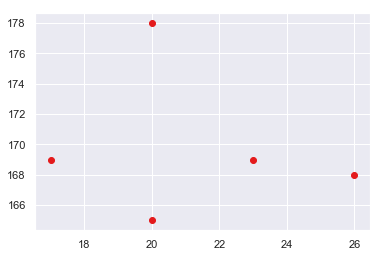

Gymnastics Age
Swimming Age


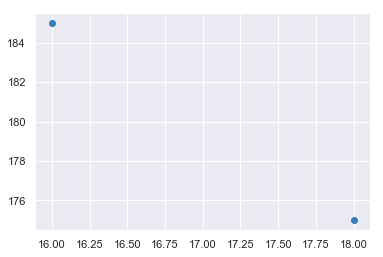

Shooting Age


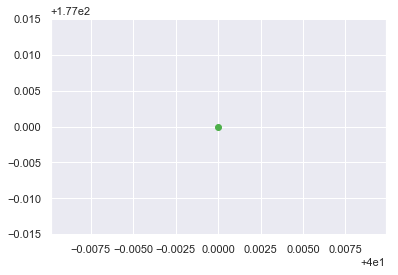

Cycling Age


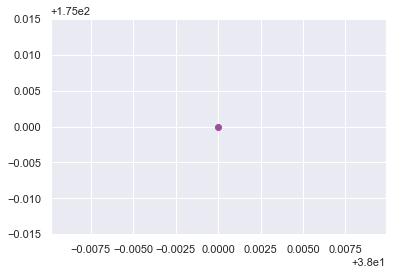

Fencing Age
Rowing Age


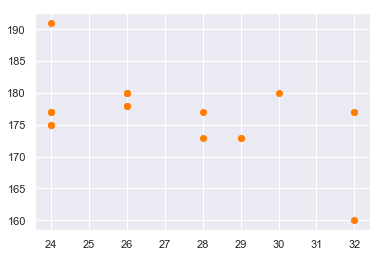

Cross Country Skiing Age
Alpine Skiing Age
Wrestling Age


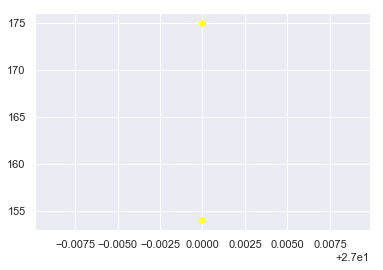

Football Age
Sailing Age
Equestrianism Age
Canoeing Age
Boxing Age
Speed Skating Age
Ice Hockey Age
Hockey Age
Biathlon Age
Basketball Age


In [56]:
# Sport wise , Female , Age and height scatter plot , Summer , Canada
types_sports = athlete_events["Sport"].value_counts().index.tolist()
types_sports = types_sports[:20]
num = 0
palette = plt.get_cmap('Set1')

for type_sport in types_sports:
    print(type_sport, "Age")
    #new_df = athlete_events.loc[(athlete_events["Sport"] == type_sport) & (athlete_events["Sex"] == "M") & (athlete_events["Medal"] == "Gold")]
    new_df_gold = athlete_events.loc[(athlete_events["Sport"] == type_sport) & (athlete_events["Sex"] == "F") & (athlete_events["Medal"] == "Gold")& (athlete_events['Season'] == "Summer")& (athlete_events['NOC'] == "CAN")]
    if new_df_gold.empty == False:
        #plt.scatter(new_df_gold['Age'], new_df_gold['Height'] ,new_df_gold['Weight'],marker='o', color=palette(num), linewidth=1, alpha=0.9, label='column')
        plt.scatter(new_df_gold['Age'], new_df_gold['Height'] ,marker='o', color=palette(num),label='column')
        num+=1
        plt.show()

Athletics Age
Gymnastics Age
Swimming Age
Shooting Age
Cycling Age
Fencing Age
Rowing Age
Cross Country Skiing Age


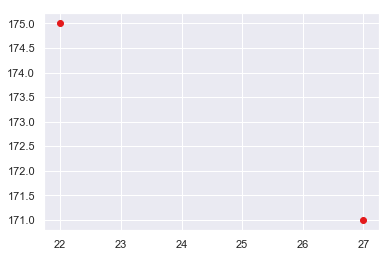

Alpine Skiing Age


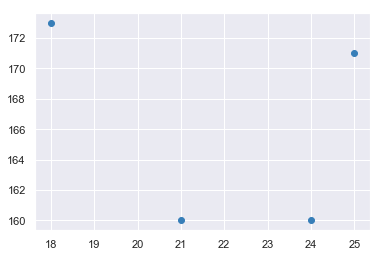

Wrestling Age
Football Age
Sailing Age
Equestrianism Age
Canoeing Age
Boxing Age
Speed Skating Age


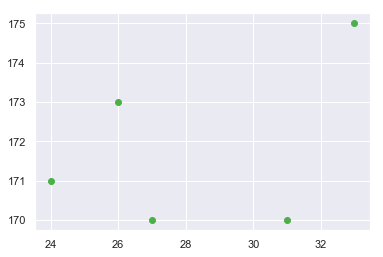

Ice Hockey Age


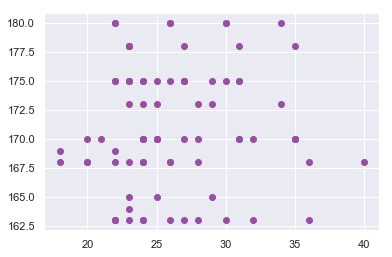

Hockey Age
Biathlon Age


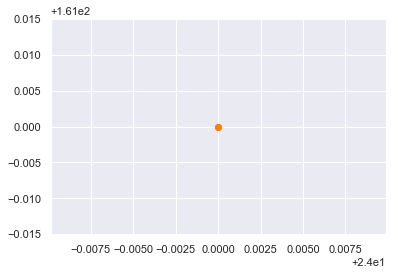

Basketball Age


In [57]:
# Sport wise , Female , Age and height scatter plot , Winter , Canada
types_sports = athlete_events["Sport"].value_counts().index.tolist()
types_sports = types_sports[:20]
num = 0
palette = plt.get_cmap('Set1')

for type_sport in types_sports:
    print(type_sport, "Age")
    #new_df = athlete_events.loc[(athlete_events["Sport"] == type_sport) & (athlete_events["Sex"] == "M") & (athlete_events["Medal"] == "Gold")]
    new_df_gold = athlete_events.loc[(athlete_events["Sport"] == type_sport) & (athlete_events["Sex"] == "F") & (athlete_events["Medal"] == "Gold")& (athlete_events['Season'] == "Winter")& (athlete_events['NOC'] == "CAN")]
    if new_df_gold.empty == False:
        #plt.scatter(new_df_gold['Age'], new_df_gold['Height'] ,new_df_gold['Weight'],marker='o', color=palette(num), linewidth=1, alpha=0.9, label='column')
        plt.scatter(new_df_gold['Age'], new_df_gold['Height'] ,marker='o', color=palette(num),label='column')
        num+=1
        plt.show()

Athletics Age
Gymnastics Age
Swimming Age
Shooting Age
Cycling Age
Fencing Age
Rowing Age
Cross Country Skiing Age


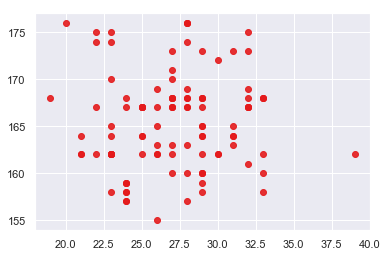

Alpine Skiing Age


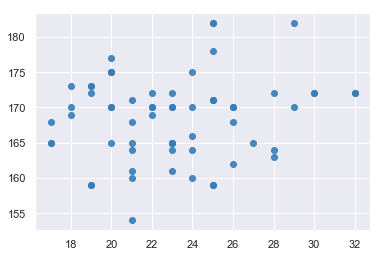

Wrestling Age
Football Age
Sailing Age
Equestrianism Age
Canoeing Age
Boxing Age
Speed Skating Age


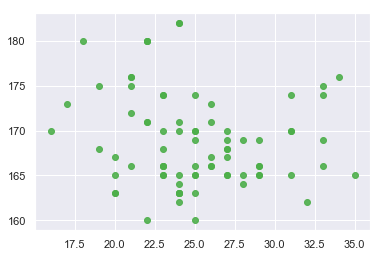

Ice Hockey Age


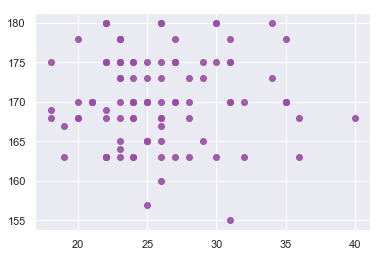

Hockey Age
Biathlon Age


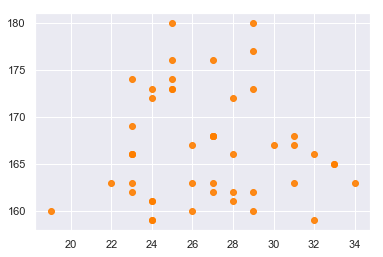

Basketball Age
Weightlifting Age
Water Polo Age
Judo Age
Handball Age
Art Competitions Age
Volleyball Age
Bobsleigh Age


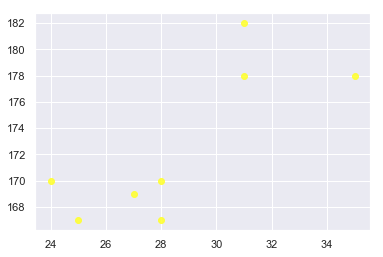

Tennis Age
Diving Age
Ski Jumping Age


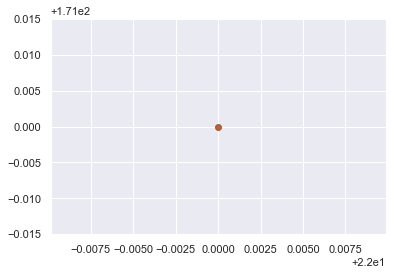

Archery Age
Figure Skating Age


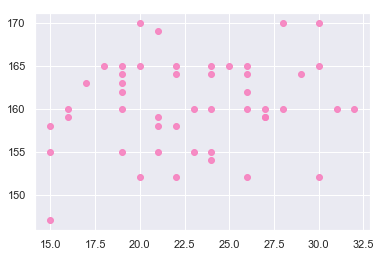

Table Tennis Age
Modern Pentathlon Age
Short Track Speed Skating Age


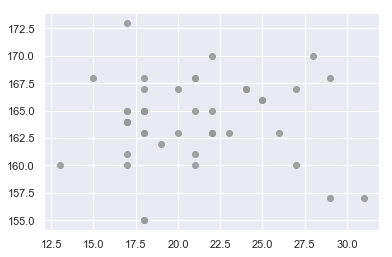

Luge Age


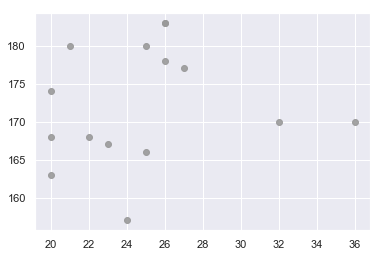

Badminton Age
Nordic Combined Age
Freestyle Skiing Age


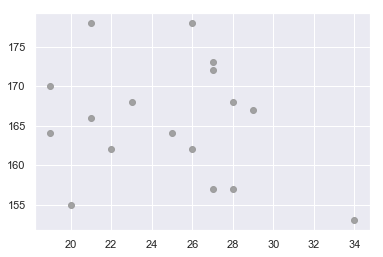

Snowboarding Age


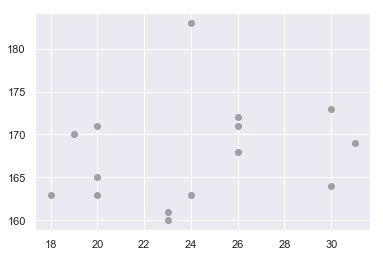

Synchronized Swimming Age
Baseball Age
Rhythmic Gymnastics Age
Taekwondo Age
Beach Volleyball Age
Triathlon Age
Softball Age
Curling Age


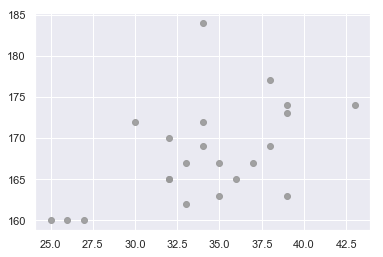

Rugby Sevens Age
Golf Age


In [58]:
# Sport wise ,Female , Age and height scatter plot , Winter - Canada
types_sports = athlete_events["Sport"].value_counts().index.tolist()
types_sports = types_sports[:50]
num = 0
palette = plt.get_cmap('Set1')

for type_sport in types_sports:
    print(type_sport, "Age")
    #new_df = athlete_events.loc[(athlete_events["Sport"] == type_sport) & (athlete_events["Sex"] == "M") & (athlete_events["Medal"] == "Gold")]
    new_df_gold = athlete_events.loc[(athlete_events["Sport"] == type_sport) & (athlete_events["Sex"] == "F") & (athlete_events["Medal"] == "Gold")& (athlete_events['Season'] == "Winter")]
    if new_df_gold.empty == False:
        plt.scatter(new_df_gold['Age'], new_df_gold['Height'] ,marker='o', color=palette(num), linewidth=1, alpha=0.9, label='column')
        num+=1
        plt.show()